In [6]:
#Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np

In [10]:
#Import CSV Files
makeup_data_2024 = Path("most_used_beauty_cosmetics_products_extended.csv")

In [16]:
#Read data. Store into Pandas DataFrames
makeup_data = pd.read_csv(makeup_data_2024)

In [18]:
makeup_data.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


In [24]:
# Group by brand and get the index of the highest rated product for each brand
highest_rated_by_brand = makeup_data.loc[makeup_data.groupby("Brand")["Rating"].idxmax()]

In [48]:
highest_rated_by_brand = highest_rated_by_brand.reset_index(drop=True)

In [50]:
highest_rated_by_brand = highest_rated_by_brand[[
    "Brand", "Product_Name", "Category"
]].sort_values(by="Brand")

In [52]:
print(highest_rated_by_brand)

                      Brand           Product_Name        Category
0   Anastasia Beverly Hills         Magic Face Oil           Serum
1                     Becca      Magic Highlighter         Bronzer
2               Bite Beauty          Ultra Mascara        CC Cream
3               Bobby Brown          Divine Primer         Bronzer
4                  Bourjois     Perfect Eye Shadow     Moisturizer
5         Charlotte Tilbury            Magic Blush      Foundation
6                  Clinique          Ultra Mascara      Exfoliator
7                 ColourPop        Magic Lip Gloss        Cleanser
8           Danessa Myricks         Magic Cleanser        CC Cream
9            Drunk Elephant         Perfect Primer       Lip Gloss
10                   E.l.f.         Super BB Cream  Makeup Remover
11                  Farsali         Divine Bronzer      Foundation
12             Fenty Beauty       Magic Foundation          Primer
13                 Glossier    Perfect Highlighter         Mas

In [96]:
skin_type_counts = makeup_data['Skin_Type'].value_counts()

print(skin_type_counts)

Skin_Type
Combination    3060
Oily           3009
Normal         2991
Sensitive      2975
Dry            2965
Name: count, dtype: int64


In [111]:
# Group by Cruelty-Free status and calculate the average rating and price
cruelty_comparison = makeup_data.groupby('Cruelty_Free')[['Rating', 'Price_USD']].mean().reset_index()

# Optional: Rename for clarity
cruelty_comparison['Cruelty_Free'] = cruelty_comparison['Cruelty_Free'].map({True: 'Cruelty-Free', False: 'Non-Cruelty-Free'})
cruelty_comparison.columns = ['Cruelty-Free Status', 'Average Rating', 'Average Price (USD)']

print(cruelty_comparison)

  Cruelty-Free Status  Average Rating  Average Price (USD)
0    Non-Cruelty-Free        2.999065            80.043303
1        Cruelty-Free        3.005670            80.227168


In [113]:
import seaborn as sns

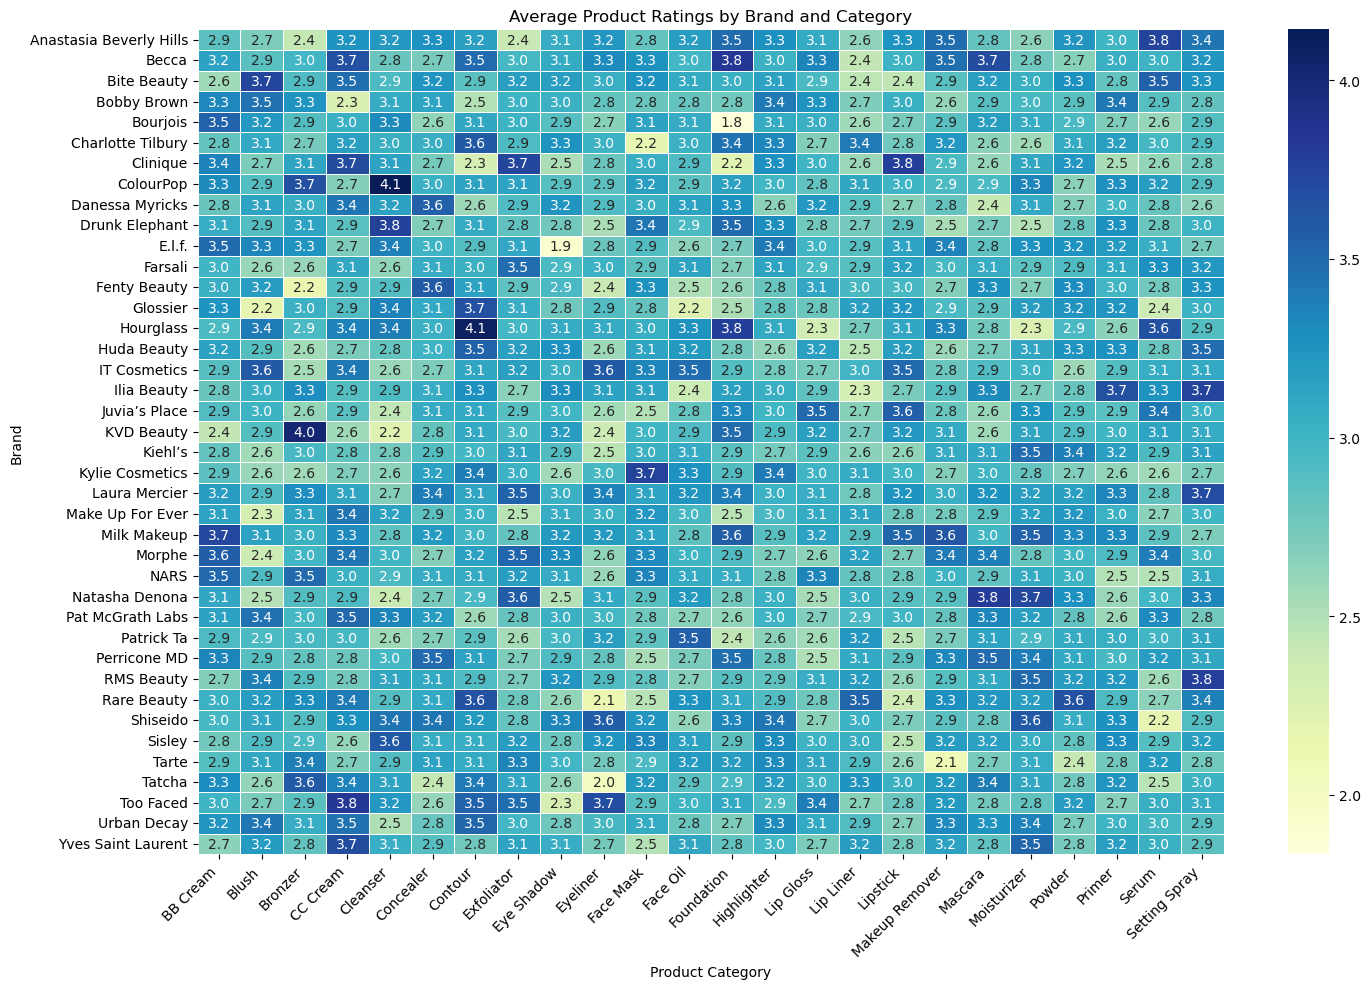

In [104]:
# Create a pivot table: average rating by Brand and Category
pivot_table = makeup_data.pivot_table(
    index='Brand',
    columns='Category',
    values='Rating',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)

plt.title('Average Product Ratings by Brand and Category')
plt.xlabel('Product Category')
plt.ylabel('Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

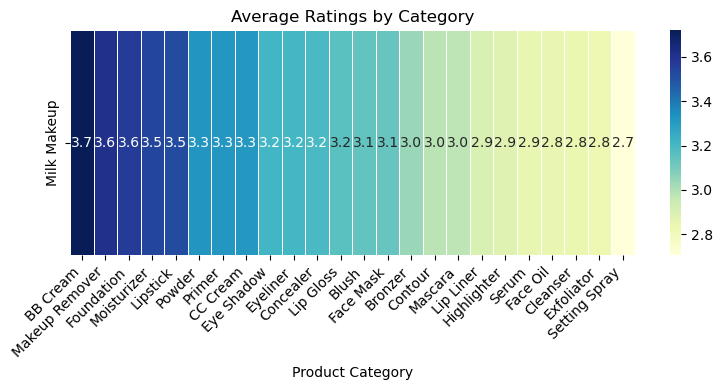

In [115]:
# Choose a brand to zoom in on
brand_to_focus = "Milk Makeup"

# Filter the dataset
brand_df = makeup_data[makeup_data['Brand'] == brand_to_focus]

# Create pivot table for that brand
brand_pivot = brand_df.pivot_table(
    index='Brand',
    columns='Category',
    values='Rating',
    aggfunc='mean'
)

# Sort columns by rating values (descending)
sorted_columns = brand_pivot.loc[brand_to_focus].sort_values(ascending=False).index
brand_pivot = brand_pivot[sorted_columns]

# Plot the zoomed-in heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(brand_pivot, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)

plt.title(f'Average Ratings by Category')
plt.xlabel('Product Category')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [117]:
# Crosstab of Category vs. Usage Frequency
usage_by_category = pd.crosstab(makeup_data['Category'], makeup_data['Usage_Frequency'])

# Optional: Normalize to get proportions instead of raw counts
usage_by_category_percent = pd.crosstab(makeup_data['Category'], makeup_data['Usage_Frequency'], normalize='index') * 100


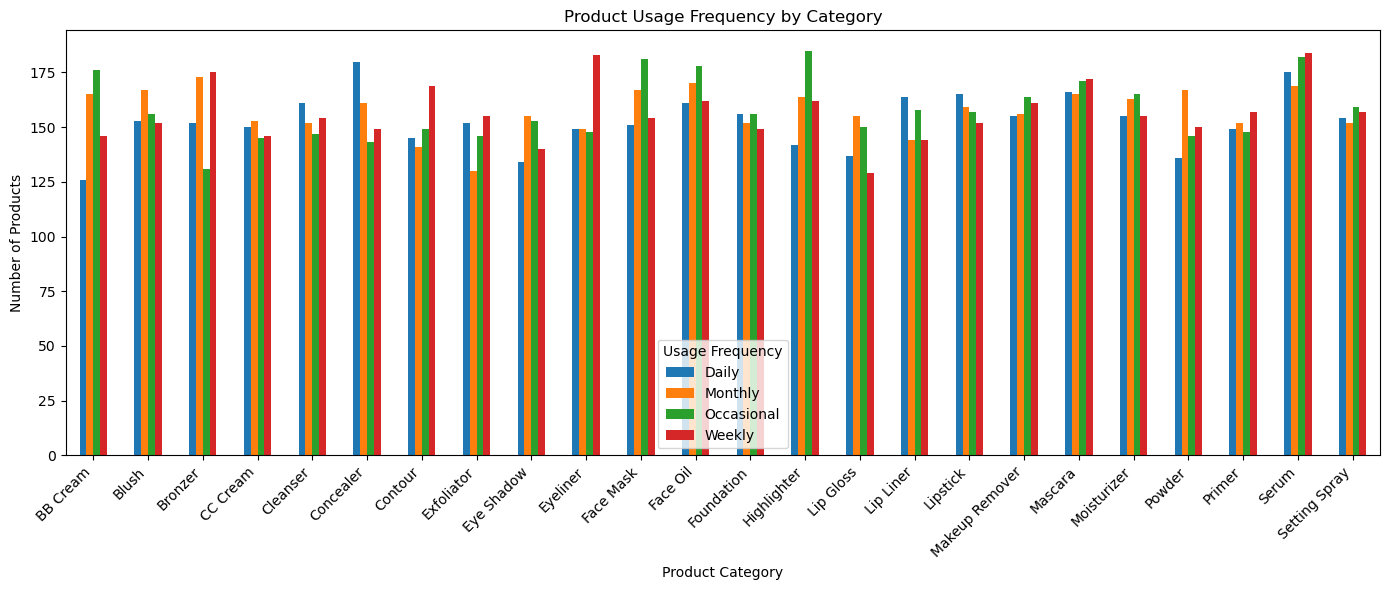

In [123]:
# Get count (not percentage) of usage frequency by category
usage_counts = pd.crosstab(makeup_data['Category'], makeup_data['Usage_Frequency'])

# Plot grouped bar chart
usage_counts.plot(kind='bar', figsize=(14, 6))

plt.title('Product Usage Frequency by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Usage Frequency')
plt.tight_layout()
plt.show()

In [125]:
# Filter to only show 'Daily' usage counts by category, sorted
daily_usage = makeup_data[makeup_data['Usage_Frequency'] == 'Daily']['Category'].value_counts()

print(daily_usage.sort_values(ascending=False))

Category
Concealer         180
Serum             175
Mascara           166
Lipstick          165
Lip Liner         164
Face Oil          161
Cleanser          161
Foundation        156
Moisturizer       155
Makeup Remover    155
Setting Spray     154
Blush             153
Exfoliator        152
Bronzer           152
Face Mask         151
CC Cream          150
Eyeliner          149
Primer            149
Contour           145
Highlighter       142
Lip Gloss         137
Powder            136
Eye Shadow        134
BB Cream          126
Name: count, dtype: int64


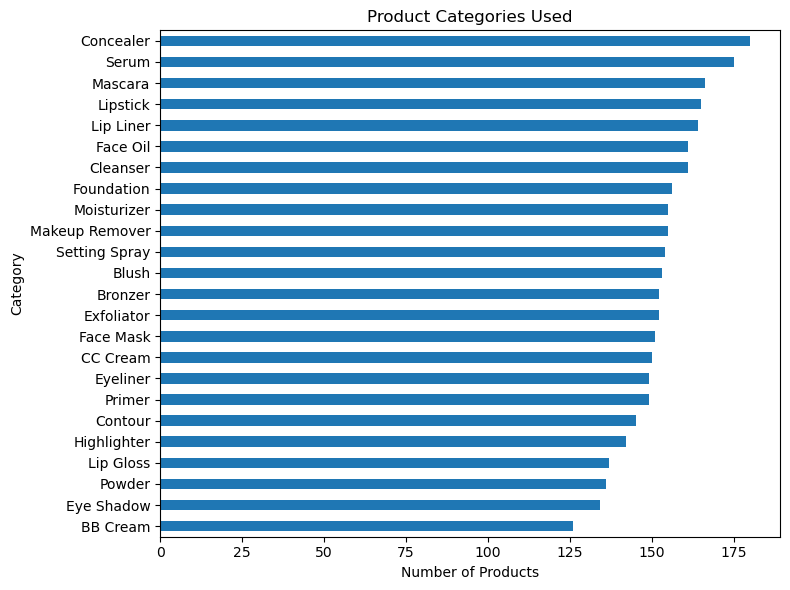

In [129]:
daily_usage.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title('Product Categories Used')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

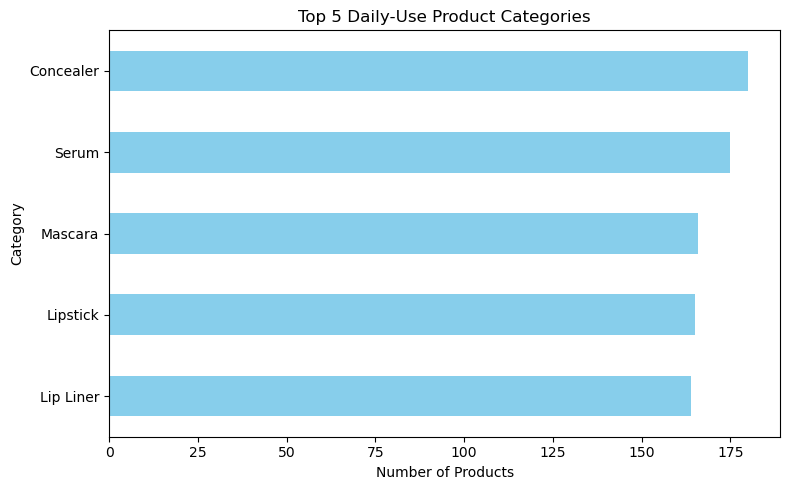

In [143]:
# Filter for daily-use products
daily_df = makeup_data[makeup_data['Usage_Frequency'] == 'Daily']

# Get counts of top 5 categories
top_categories = ['Concealer', 'Serum', 'Mascara', 'Lipstick', 'Lip Liner']
daily_counts = daily_df['Category'].value_counts()
daily_counts = daily_counts[daily_counts.index.isin(top_categories)]

# Sort to control bar order
daily_counts = daily_counts.sort_values(ascending=True)

# Plot horizontal bar chart
daily_counts.plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title('Top 5 Daily-Use Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

To identify strategic product categories for a new brand entering the beauty market, I analyzed usage frequency across 15,000 cosmetic products. The analysis showed that concealer, serum, mascara, lipstick, and lip liner had the highest counts in the ‘Daily’ usage category. These findings suggest that launching with these core products may provide the best opportunity to meet consumer demand and establish habitual use.